In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from ib_insync.ib import IB, util
import os
import sys

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from optopus.ib_adapter import IBBrokerAdapter
from optopus.optopus import Optopus
from optopus.data_manager import DataManager, DataSource
from optopus.data_objects import IndexAsset, OptionChainAsset
from optopus.utils import pdo

%matplotlib inline

In [2]:
host = '127.0.0.1'
#port = 4002  # Gateway
port = 7497  # TWS
client = 2

util.startLoop()
ib = IB()
ib.connect(host, port, client)
opt = Optopus(IBBrokerAdapter(ib))

In [3]:
symbol = 'SPX'
u = IndexAsset(symbol, DataSource.IB)
uf = ['high', 'low', 'close', 'bid', 'bid_size', 'ask', 'ask_size',
             'last', 'last_size', 'time', 'midpoint', 'market_price']
oc = OptionChainAsset(u, underlying_distance=1.5)
ocf = ['high', 'low', 'close',
      'bid', 'bid_size', 'ask', 'ask_size', 'last', 'last_size',
      'volume', 'delta', 'gamma', 'theta', 'vega', 'implied_volatility', 'underlying_price', 'underlying_dividens', 
      'moneyness', 'intrinsic_value', 'extrinsic_value', 'option_price', 'time']

In [4]:
udf = pdo(opt.current(u, uf))
ocdf = pdo(opt.current(oc, ocf))

ERROR:ib_insync.client:Decode failed
Traceback (most recent call last):
  File "/home/ilia/anaconda3/lib/python3.6/site-packages/ib_insync/client.py", line 252, in _onSocketHasData
    self._decode(fields)
  File "/home/ilia/anaconda3/lib/python3.6/site-packages/ib_insync/client.py", line 323, in _decode
    float(price), int(size))
ValueError: could not convert string to float: 
ERROR:ib_insync.client:Decode failed
Traceback (most recent call last):
  File "/home/ilia/anaconda3/lib/python3.6/site-packages/ib_insync/client.py", line 252, in _onSocketHasData
    self._decode(fields)
  File "/home/ilia/anaconda3/lib/python3.6/site-packages/ib_insync/client.py", line 323, in _decode
    float(price), int(size))
ValueError: could not convert string to float: 


Contracts: 108 Unqualified: 0


In [5]:
udf

code                                         SPX
high                                     2850.49
low                                      2831.44
close                                    2818.37
bid                                          NaN
bid_size                                     NaN
ask                                          NaN
ask_size                                     NaN
last                                     2847.37
last_size                                      0
time            2018-08-16 17:26:02.957193+00:00
midpoint                                     NaN
market_price                             2847.37
dtype: object

In [6]:
ocdf.columns

Index(['expiration', 'strike', 'right', 'high', 'low', 'close', 'bid',
       'bid_size', 'ask', 'ask_size', 'last', 'last_size', 'volume', 'delta',
       'gamma', 'theta', 'vega', 'implied_volatility', 'underlying_price',
       'moneyness', 'intrinsic_value', 'extrinsic_value', 'option_price',
       'time'],
      dtype='object')

In [17]:
ocdf['T_V_ratio'] = ocdf['theta']/ocdf['vega']

In [18]:
exp1 = ocdf.expiration.unique()[0]
exp2 = ocdf.expiration.unique()[1]
exp3 = ocdf.expiration.unique()[2]
oedf1 = ocdf[ocdf['expiration']==exp1]
oedf2 = ocdf[ocdf['expiration']==exp2]
oedf3 = ocdf[ocdf['expiration']==exp3]

underlying_price = ocdf.underlying_price.unique()[0]

color1 = 'gold'
color2 = 'goldenrod'
color3 = 'darkgoldenrod'
label1 = str( (exp1 - datetime.datetime.now().date()).days) + ' DTE'
label2 = str( (exp2 - datetime.datetime.now().date()).days) + ' DTE'
label3 = str( (exp3 - datetime.datetime.now().date()).days) + ' DTE'

In [19]:
df1 = oedf1[oedf1['right'] == 'C']
df2 = oedf2[oedf2['right'] == 'C']
df = ocdf[ocdf['right'] == 'C']

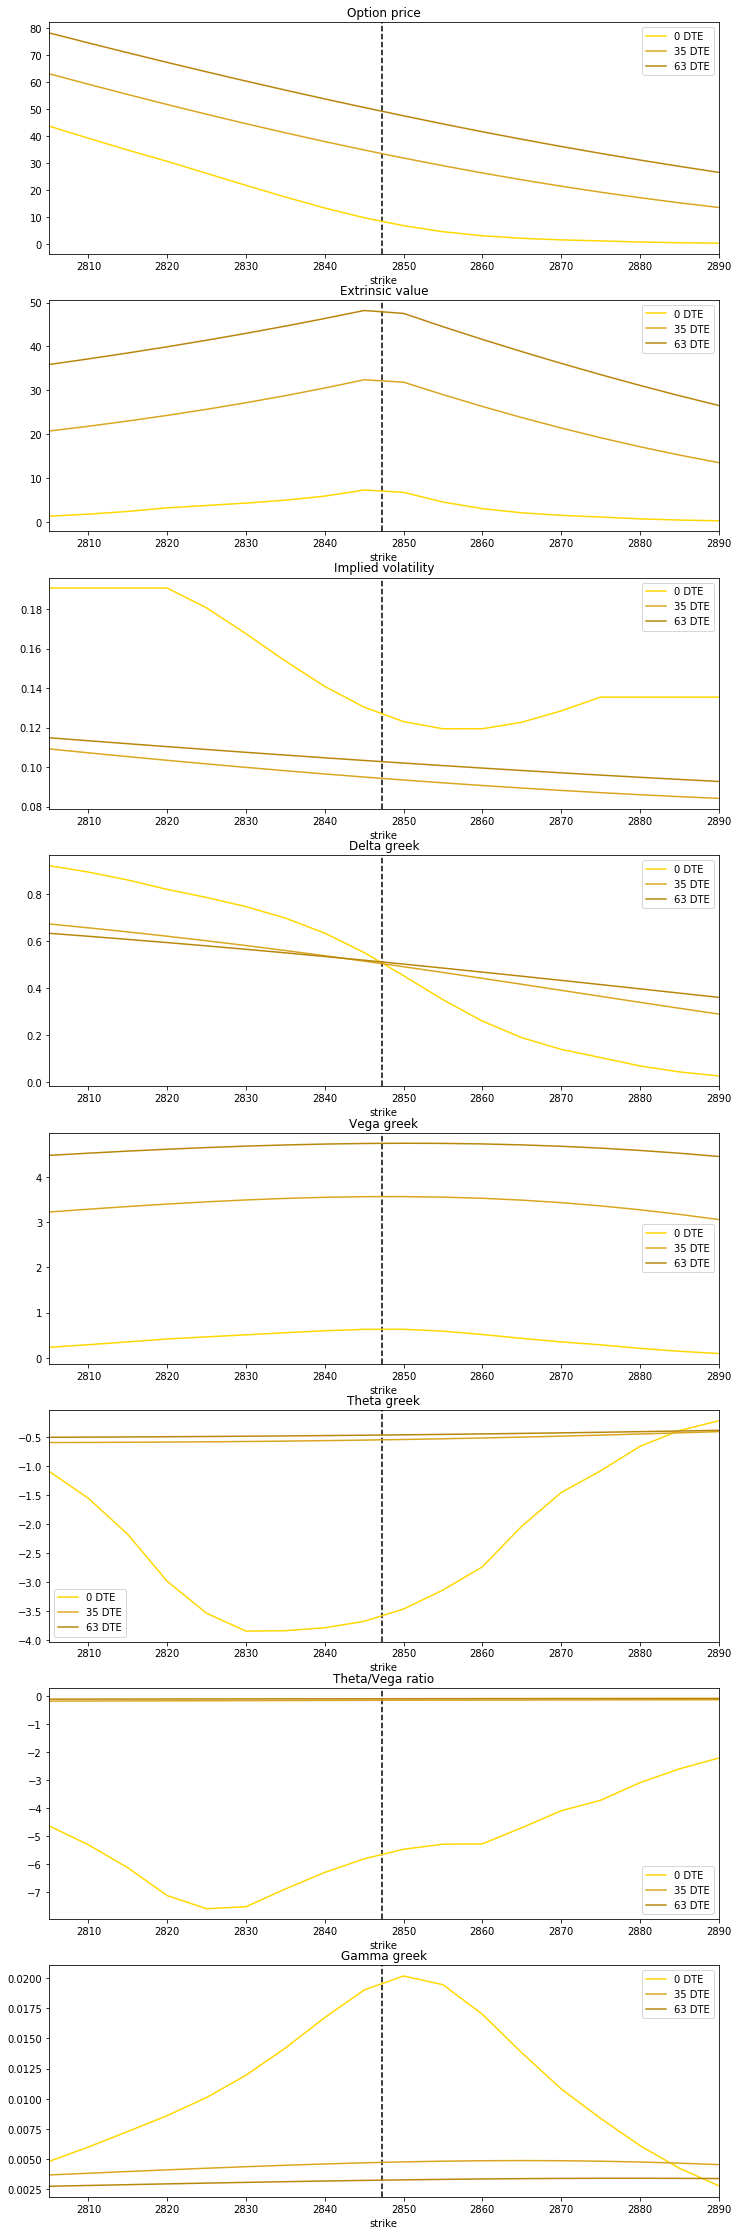

In [21]:
plots = {'Option price': ('strike', 'option_price'), 'Extrinsic value': ('strike', 'extrinsic_value'),
        'Implied volatility': ('strike','implied_volatility'), 'Delta greek': ('strike', 'delta'),
         'Vega greek': ('strike', 'vega'), 'Theta greek': ('strike', 'theta'),
         'Theta/Vega ratio': ('strike', 'T_V_ratio'),
         'Gamma greek': ('strike', 'gamma')}
total = len(plots)

fig = plt.figure(figsize=(12,40))
n_plot = 1
for title, a in plots.items():
    ax = plt.subplot(total, 1, n_plot)
    n_plot+=1
    ax.axvline(underlying_price, color='k', linestyle='--')
    df[df['expiration']==exp1].plot(ax=ax, kind='line', x=a[0], y=a[1], color=color1, label=label1, title=title)
    df[df['expiration']==exp2].plot(ax=ax, kind='line', x=a[0], y=a[1], color=color2, label=label2)
    df[df['expiration']==exp3].plot(ax=ax, kind='line', x=a[0], y=a[1], color=color3, label=label3)

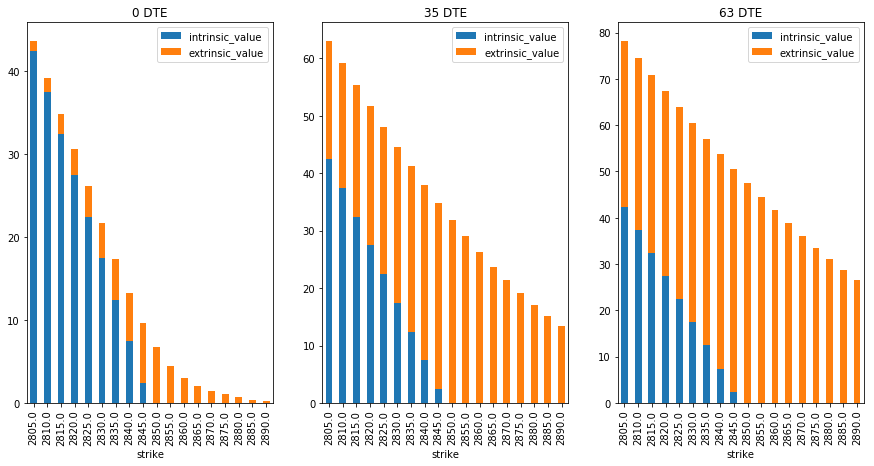

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,7))
df[df['expiration']==exp1][['strike', 'intrinsic_value', 'extrinsic_value']].plot(ax=ax1, x='strike', kind='bar', stacked=True, title=label1)
df[df['expiration']==exp2][['strike', 'intrinsic_value', 'extrinsic_value']].plot(ax=ax2, x='strike', kind='bar', stacked=True, title=label2)
df[df['expiration']==exp3][['strike', 'intrinsic_value', 'extrinsic_value']].plot(ax=ax3, x='strike', kind='bar', stacked=True, title=label3)